### Exploration of Three Data Sets
A collection of grocery receipts were transcribed by hand by three different students. We explore discrepancies in their results.

In [1]:
import datetime
from statistics import mean, stdev

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

%matplotlib inline

In [2]:
%%time
DATA_PATH = '../Data/'
FILE_NAME = 'Max, Samantha, Maria data.xlsx'
COLS = [0, 1, 2]  # ID, Session, Receipt

df_max = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Max', usecols=COLS)
df_mar = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Maria', usecols=COLS)
df_sam = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Samantha', usecols=COLS)

dfs = [df_max, df_mar, df_sam]

C:\Users\Joseph\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell D2858 is marked as a date but the serial value 6684137 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


Wall time: 3.66 s


In [3]:
column_names = ['ID', 'Session', 'Receipt']
for df in dfs:
    df.columns = column_names

In [4]:
ids_assigned_all = {121, 114, 137, 153, 141, 127, 130, 135, 148, 158}
ids_assigned_max = {129, 136, 144, 147, 151, 156, 160, 112, 117, 120} | ids_assigned_all
ids_assigned_mar = {128, 134, 143, 146, 150, 154, 159, 110, 115, 119} | ids_assigned_all
ids_assigned_sam = {131, 139, 145, 149, 152, 157, 162, 113, 118, 126} | ids_assigned_all

In [5]:
def make_venn(data, names):
    """Creates a Venn diagram from a list of 3 data sets and a list of their names."""
    plt.figure(figsize=(11, 11))
    v = venn3([data[0], data[1], data[2]], (names[0], names[1], names[2]))

    v.get_label_by_id('100').set_text('\n'.join(str(s) for s in (data[0] - data[1] - data[2])))
    v.get_label_by_id('110').set_text('\n'.join(str(s) for s in (data[0] & data[1] - data[2])))
    v.get_label_by_id('010').set_text('\n'.join(str(s) for s in (data[1] - data[0] - data[2])))
    v.get_label_by_id('101').set_text('\n'.join(str(s) for s in (data[0] & data[2] - data[1])))
    v.get_label_by_id('111').set_text('\n'.join(str(s) for s in (data[0] & data[1] & data[2])))
    v.get_label_by_id('011').set_text('\n'.join(str(s) for s in (data[1] & data[2] - data[0])))
    v.get_label_by_id('001').set_text('\n'.join(str(s) for s in (data[2] - data[0] - data[1])))

    plt.savefig('../Output/id_venn_diagram.png')

As designed:

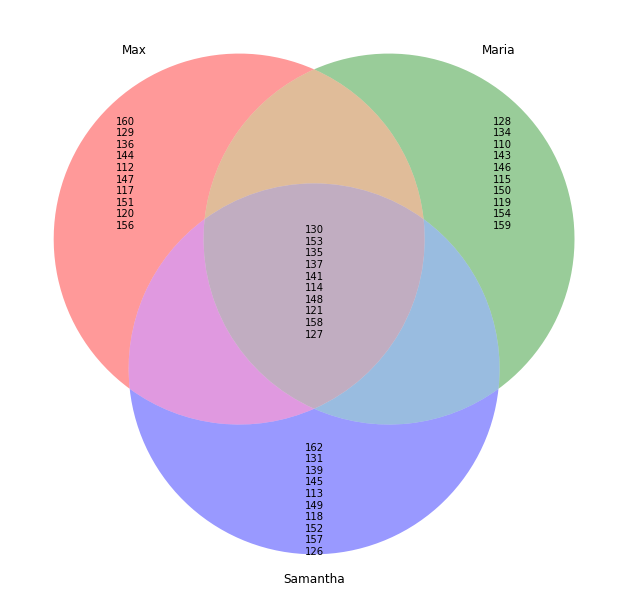

In [6]:
make_venn([ids_assigned_max, ids_assigned_mar, ids_assigned_sam], ['Max', 'Maria', 'Samantha'])

Results:

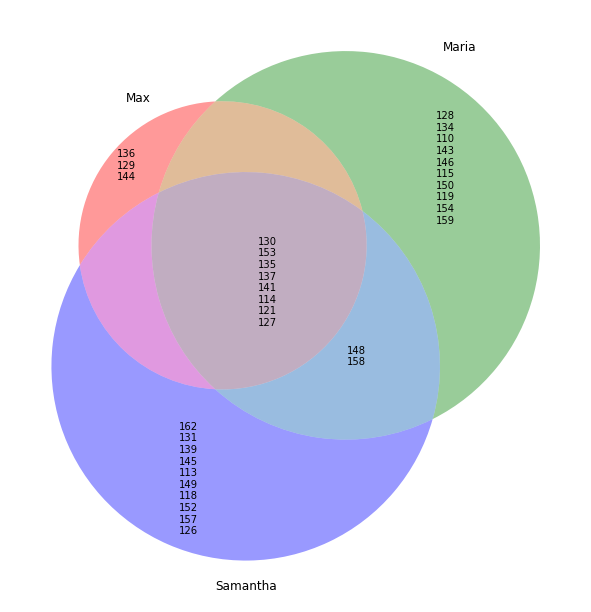

In [7]:
make_venn([set(df_max.ID.unique()), set(df_mar.ID.unique()), set(df_sam.ID.unique())], ['Max', 'Maria', 'Samantha'])

Examine control data sets

In [8]:
print(f"Transcription data for {ids_assigned_max - set(df_max.ID.unique())} is missing from Max's data set.")

Transcription data for {160, 112, 147, 148, 117, 151, 120, 156, 158} is missing from Max's data set.


In [9]:
ids_all_three = set.intersection(set(df_max.ID.unique()), set(df_mar.ID.unique()), set(df_sam.ID.unique()))
ids_only_two = set.intersection(set(df_mar.ID.unique()), set(df_sam.ID.unique()) - set(df_max.ID.unique()))

print(f"We are left with two overlapping control sets.")
print(f"{ids_all_three} is transcribed by all three.")
print(f"{ids_only_two} is transcribed only by Maria and Samantha.")

We are left with two overlapping control sets.
{130, 153, 135, 137, 141, 114, 121, 127} is transcribed by all three.
{148, 158} is transcribed only by Maria and Samantha.


In [10]:
dfs_all_three = [df[df.ID.isin(ids_all_three)].reset_index(drop=True) for df in dfs]
dfs_only_two = [df[df.ID.isin(ids_only_two)].reset_index(drop=True) for df in [df_mar, df_sam]]

### All Three Control

Variation in number of receipts.

In [11]:
receipts_all_three = (dfs_all_three[0].groupby(by=['ID', 'Session']).nunique()
                      .join(dfs_all_three[1].groupby(by=['ID', 'Session']).nunique(), rsuffix='1')
                      .join(dfs_all_three[2].groupby(by=['ID', 'Session']).nunique(), rsuffix='2')).groupby(level=0).sum()
display(receipts_all_three)

,Receipt,Receipt1,Receipt2
ID,,,
114,14,14,14
121,0,0,0
127,12,10,13
130,20,20,20
135,16,16,15
137,4,5,4
141,2,0,2
153,8,8,9


In [12]:
receipts_all_three.std(axis=1)

ID
114    0.000000
121    0.000000
127    1.527525
130    0.000000
135    0.577350
137    0.577350
141    1.154701
153    0.577350
dtype: float64

We find a positive variance in the number of receipts transcribed in 5 of the 8 participants.

Variation in number of items.

In [13]:
items_all_three = pd.concat([df.groupby(by=['ID', 'Session']).size() for df in dfs_all_three], axis=1).groupby(level=0).sum()
display(items_all_three)

,0,1,2
ID,,,
114,150.0,151,150.0
121,262.0,257,264.0
127,203.0,194,203.0
130,229.0,297,229.0
135,229.0,229,213.0
137,140.0,139,141.0
141,142.0,120,139.0
153,185.0,186,213.0


In [14]:
items_all_three.std(axis=1)

ID
114     0.577350
121     3.605551
127     5.196152
130    39.259818
135     9.237604
137     1.000000
141    11.930353
153    15.885003
dtype: float64

We find a positive variance in the number of items transcribed in 6 of the 8 participants.

In [15]:
mean([df.shape[0] for df in dfs_all_three])

1555

In [16]:
stdev([df.shape[0] for df in dfs_all_three])

16.703293088490067

### Only Two Control

Variation in number of receipts.

In [17]:
receipts_only_two = (dfs_only_two[0].groupby(by=['ID', 'Session']).nunique()
                      .join(dfs_only_two[1].groupby(by=['ID', 'Session']).nunique(), rsuffix='1'))
display(receipts_only_two)

Receipt  Receipt1
ID  Session                   
148 1              0         0
    2              2         2
    3              0         0
    4              0         0
    5              0         0
    6              0         0
158 1              0         0

We find no positive variance in the number of receipts recorded in any of the 7 transcription sessions.

Variation in number of items.

In [18]:
items_only_two = pd.concat([df.groupby(by=['ID', 'Session']).size() for df in dfs_only_two], axis=1).groupby(level=0).sum()
display(items_only_two)

,0,1
ID,,
148,303,305
158,11,13


In [19]:
items_only_two.std(axis=1)

ID
148    1.414214
158    1.414214
dtype: float64

We find a positive variance in the number of items recorded in 1 of the 7 transcription sessions.

In [20]:
mean([df.shape[0] for df in dfs_only_two])

316

In [21]:
stdev([df.shape[0] for df in dfs_only_two])

2.8284271247461903